# 2. Zadaća

**Borna Gajić**

In [1]:
import numpy as np
from numpy import linalg
from numpy import linspace
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
import seaborn as sns

## 1. Zadatak

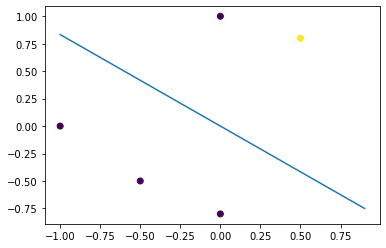

In [21]:
z1_x = np.array([[0, -0.8], [-1, 0], [-0.5, -0.5], [0, 1], [0.5, 0.8]])
z1_y = np.array([-1, -1, -1, -1, 1])
z1_theta = np.array([2.5, 3])

z1_a = np.arange(np.min(z1_x), np.max(z1_x), 0.1)

plt.scatter(z1_x[:, 0], z1_x[:, 1], c = z1_y)
plt.plot(z1_a, -z1_theta[0]/z1_theta[1] * z1_a)
plt.show()

Ovaj model **neispravno** klasificira dane podatke!

## 2. Zadatak

In [34]:
input_x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

 * XNOR

Nije moguće klasificirati podatke

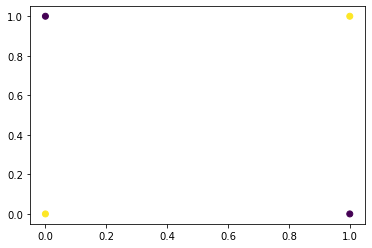

In [35]:
xnor_y = np.array([1, -1, -1, 1])

plt.scatter(input_x[:, 0], input_x[:, 1], c = xnor_y)
plt.show()

 * NAND

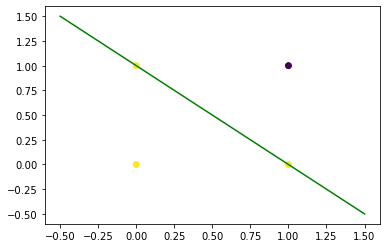

In [41]:
nand_y = np.array([1, 1, 1, -1])
nand_theta = np.array([1, 1, 1])

plt.plot(np.arange(-0.5, 2), nand_theta[0] - (nand_theta[1] / nand_theta[2]) * np.arange(-0.5, 2), c = 'g')
plt.scatter(input_x[:, 0], input_x[:, 1], c = nand_y)
plt.show()

 * NOR

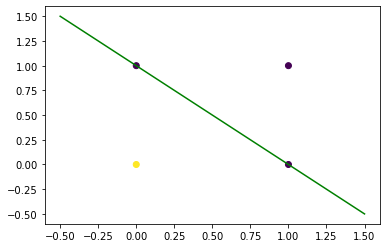

In [42]:
nand_y = np.array([1, -1, -1, -1])

plt.plot(np.arange(-0.5, 2), nand_theta[0] - (nand_theta[1] / nand_theta[2]) * np.arange(-0.5, 2), c = 'g')
plt.scatter(input_x[:, 0], input_x[:, 1], c = nand_y)
plt.show()

## 3. Zadatak

Perceptron algoritam za problem klasifikacije podataka s obzirom na jednu od dvije klase $\{-1, 1\}$

In [45]:
def perceptron (X: np.array, Y: np.array, plot_steps = False):
    k = 0
    m, n = X.shape
    theta = np.zeros(n)
    smh = False
    
    x_a = 0
    if plot_steps == True:
        x_a = np.arange(np.round(np.min(X)), np.round(np.max(X)))
        
    while smh == False:
        for i in range(m):
            signPred = np.sign(np.inner(theta, X[i]))
            if signPred == 0: signPred += 1
                
            if Y[i, 0] != signPred:
                theta += Y[i] * X[i]
                k += 1
                
        if plot_steps == True:
            plt.scatter(X[:, 1], X[:, 2], c = Y)
            plt.plot(x_a, -theta[0]/theta[2] - (theta[1] / theta[2]) * x_a, color = "red")
            plt.show()

        gg = Y * theta * X
        smh = (gg.sum(axis = 1) > 0).all()
        
    return theta.reshape(-1, 1), k

Treniranje modela:
   * Podaci iz skupa A:

In [5]:
data_x_a = pd.read_csv('./Podaci/X_a.csv')
data_y_a = pd.read_csv('./Podaci/y_a.csv')

X_a = data_x_a.to_numpy()
X_a = np.c_[np.ones(X_a.shape[0]), X_a]
Y_a = data_y_a.to_numpy()

theta_a, k_a = perceptron(X_a, Y_a)
print("Theta: \n", theta_a)
print("Broj izmjena thete: ", k_a)

Theta: 
 [[ -2.        ]
 [-63.88662382]
 [ 63.64508767]]
Broj izmjena thete:  18


 * Podaci iz skupa B:

In [6]:
data_x_b = pd.read_csv('./Podaci/X_b.csv')
data_y_b = pd.read_csv('./Podaci/y_b.csv')

X_b = data_x_b.to_numpy()
X_b = np.c_[np.ones(X_b.shape[0]), X_b]
Y_b = data_y_b.to_numpy()

theta_b, k_b = perceptron(X_b, Y_b)
print("Theta: \n", theta_b)
print("Broj izmjena thete: ", k_b)

Theta: 
 [[ -2.        ]
 [-58.98404447]
 [ 50.57748303]]
Broj izmjena thete:  12


In [431]:
# k <= R^2 / H^2

R_a = np.amax(np.linalg.norm(X_a, axis = 1), axis = 0)
R_b = np.amax(np.linalg.norm(X_b, axis = 1), axis = 0)

geom_margin_a = np.sqrt(R_a**2 / k_a)
geom_margin_b = np.sqrt(R_b**2 / k_b)

print("Geometrijska margina u podacima A: ", geom_margin_a)
print("Geometrijska margina u podacima B: ", geom_margin_b)

Geometrijska margina u podacima A:  10.186360583821168
Geometrijska margina u podacima B:  13.395069096616758


Grafički prikaz podataka iz skupa A:

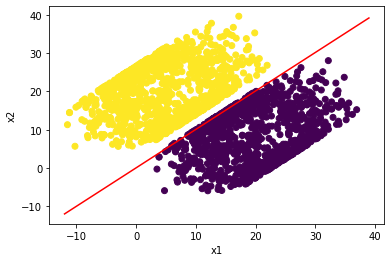

In [424]:
x_a = np.arange(np.round(np.min(X_a)), np.round(np.max(X_a)))

plt.scatter(X_a[:, 1], X_a[:, 2], c = Y_a)
plt.plot(x_a, -theta_a[0]/theta_a[2] - (theta_a[1] / theta_a[2]) * x_a, color = "red")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Grafički prikaz podataka iz skupa B:

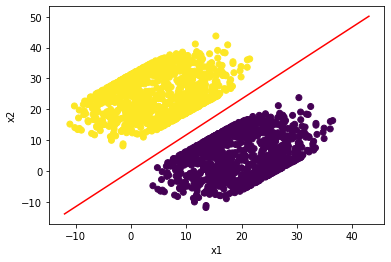

In [293]:
x_b = np.arange(np.round(np.min(X_b)), np.round(np.max(X_b)))

plt.scatter(X_b[:, 1], X_b[:, 2], c = Y_b)
plt.plot(x_b, -theta_b[0]/theta_b[2] - (theta_b[1] / theta_b[2]) * x_b, color = "red")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Prvi skup podataka (A) je teži za klasificirati jer se podaci nisu u potpunosti polarizirali u odnosu na model funkciju.

In [432]:
print("Gornja ograda za podatke iz skupa A (R_a):", R_a)
print("Gornja ograda za podatke iz skupa B (R_b):", R_b)

Gornja ograda za podatke iz skupa A (R_a): 43.21706786658784
Gornja ograda za podatke iz skupa B (R_b): 46.40188049247194


## 4. Zadatak

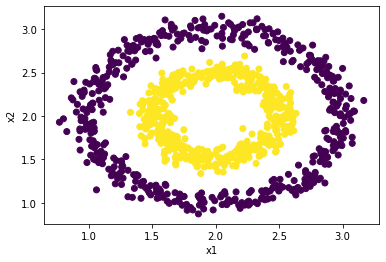

In [4]:
data_2x_a = pd.read_csv('./Podaci/2X_a.csv')
data_2y_a = pd.read_csv('./Podaci/2y_a.csv')

X2_a = data_2x_a.to_numpy()
X2_a = np.c_[np.ones(X2_a.shape[0]), X2_a]
Y2_a = data_2y_a.to_numpy()

plt.scatter(X2_a[:, 1], X2_a[:, 2], c = Y2_a)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Ove podatke možemo klasificirati kružnicom:

In [46]:
# theta[0] + theta[1]*x1 + theta[2]*x2 + theta[3]*x1^2 + theta[4]*x2^2
m_X2_a = np.c_[X2_a, X2_a[:, 1]**2, X2_a[:, 2]**2]

theta2_a, k2_a = perceptron(m_X2_a, Y2_a)

print("Theta: \n", theta2_a)
print("Broj izmjena thete: ", k2_a)

Theta: 
 [[-250.        ]
 [ 140.32308734]
 [ 134.84321346]
 [ -35.14042526]
 [ -34.4755286 ]]
Broj izmjena thete:  8222


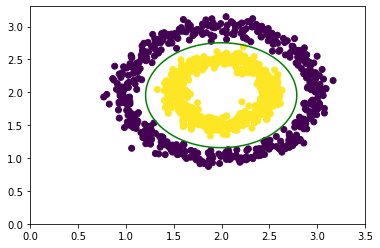

In [48]:
x2_a = -np.linspace(-3.5, 0., 1000)
y2_a = np.linspace(0., 3.0, 1000)

x, y = np.meshgrid(x2_a, y2_a)

circle_eq = theta2_a[1] * x + theta2_a[2] * y + theta2_a[3] * x**2 + theta2_a[4] * y**2
z = -theta2_a[0]

plt.scatter(X2_a[:, 1], X2_a[:, 2], c = Y2_a)
plt.contour(x, y, circle_eq, z, colors = 'g')
plt.show()

## 5. Zadatak

In [ ]:
x, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=4)
x = np.c_[np.ones(x.shape[0]), x]
y = np.where(y == 0, -1, y).reshape(-1, 1)

theta_blob, k_blob = perceptron(x, y.reshape(-1, 1), True)
print(theta_blob, k_blob)

Metoda ne konvergira jer podaci nisu linearno separabilni.
Model funkcija (pravac) se kreće prema dijelu gdje se donekle odvajaju podaci no ona nikada zapravo ne uspije razdojiti podatke pa i s time završiti. 